
 __Scientific Computing, TU Berlin, WS 2019/2020, Lecture 13__

 Jürgen Fuhrmann, WIAS Berlin



## Mesh generation


  - Regard boundary value problems for PDEs in a finite domain $\Omega\subset \mathbb R^d$
  - Solution spaces for PDEs are  infinite dimensional $\Rightarrow$ develop finite dimensional
    approximations
  - One way of defining such approximations is based on the subdivision of $\Omega$ into a
    finite number of elementary closed subsets $T_1\dots T_M$, called *mesh* or *grid*
  - During this course:
      - Assume the domain is polygonal, its boundary $\partial\Omega$ is the union of a finite
        number of subsets of hyperplanes in $\mathbb R^n$ (line segments for $d=2$, planar polygons for $d=3$)
      - Elementary shapes are triangles or quadrilaterals ($d=2$) or tetrahedra or cuboids ($d=3$)
      - Focus on simplexes (triangles, tetrahedra)
        - Geometrically most flexible
        - Starting point for more general methods
      - Focus on $d=2$,
      - Further reading: see [J.Shewchuk](http://web.mit.edu/ehliu/Public/ProjectX/Summer2005/delnotes.pdf)



## Admissible grids

__Definiton:__
A grid $\{T_1\dots T_M\}$ of $\Omega$ is admissible if
- $\Omega$ is the union of the elementary cells: $\bar \Omega= \cup_{m=1}^{M} T_m$
- If $T_m\cap T_n$ consists of exactly one point, then this point is a common vertex
  of $T_m$ and $T_n$.
- If for $m\neq n$, $T_m\cap T_n$ consists of more than one point, then $T_m\cap T_n$
  is a common edge (or a common facet for $d=3$) of $T_m$ and $T_n$.

<img src="https://www.wias-berlin.de/people/fuhrmann/blobs/admiss.png" width=500 />

Image (Source: Braess): Left -  admissible mesh,  right - mesh with "hanging" nodes



## Acute and weakly acute triangulations

__Definition__: A triangulation $\{T_1\dots T_M\}$  of a domain $\Omega$ is
- *acute*, if all interior angles of all triangles are less than $\frac\pi2$,
- *weakly* acute, if all interior angles of all triangles are less than or equal to $\frac\pi2$.



## Voronoi diagram

After G. F. Voronoi, 1868-1908

__Definition__: Let $\mathbf p,\mathbf q\in \mathbb R^d$. The set of points
$H_{\mathbf p\mathbf q}=\left\{\mathbf x\in \mathbb R^d: ||\mathbf x-\mathbf p||\leq ||\mathbf x-\mathbf q||\right\}$
is the  *half space* of points $\mathbf x$ closer to $\mathbf p$ than to $\mathbf q$.

__Definition__: Given a finite set of points $S\subset \mathbb R^d$,
the *Voronoi region (Voronoi cell)* of a point $\mathbf p\in S$ is  the set of points
$\mathbf x$ closer to $\mathbf p$ than to any other point $\mathbf q\in S$:
$$V_\mathbf p=\left\{\mathbf x\in \mathbb R^d: ||\mathbf x-\mathbf p||\leq ||\mathbf x-\mathbf q||\,\forall \mathbf q\in S\right\}$$

The *Voronoi diagram* of $S$ is the collection of the Voronoi regions of the
points of $S$.



## Voronoi diagram II

- The Voronoi diagram subdivides the whole  space into ``nearest neigbor'' regions
- Being intersections of half planes, the Voronoi regions are convex sets

<img src="https://www.wias-berlin.de/people/fuhrmann/blobs/voronoi.png" width=300 />

  Voronoi diagram of 8 points in the plane (H. Si)
\end{minipage}



## Delaunay triangulation

After B.N. Delaunay (Delone), 1890-1980

- Given a finite set of points $S\subset \mathbb R^d$
- Assume that the points of $S$ are in *general position*, i.e.
    no $d+2$ points of $S$ are on one sphere (in 2D: no 4 points on one circle)
  - Connect each pair of points whose Voronoi regions share a common edge with a line
  - $\Rightarrow$ *Delaunay triangulation* of the convex hull of $S$

<img src="https://www.wias-berlin.de/people/fuhrmann/blobs/delaunay.png" width=300 />

Delaunay triangulation of the convex hull of  8 points in the plane (H.Si)

Interactive example [via GEOGRAM](http://homepages.loria.fr/BLevy/GEOGRAM/geogram_demo_Delaunay2d.html)



## Delaunay triangulation II

- The *circumsphere* (*circumcircle* in 2D) of a $d$-dimensional simplex is the unique  sphere containing all vertices of the simplex
- The *circumball* (circumdisc in 2D) of a simplex is the unique (open) ball which has the  circumsphere of the simplex as boundary

__Definition__: A triangulation of the convex hull of a point set $S$
has the *Delaunay property* if each simplex (triangle) of the triangulation
is Delaunay, i.e. its circumsphere (circumcircle) is empty wrt. $S$, i.e. it does not contain any points of $S$.


- The Delaunay triangulation of a point set $S$, where all points are  in general position is unique
- Otherwise there is an ambiguity - if e.g. 4 points are one circle, there are two ways to connect them resulting in Delaunay triangles



## Edge flips and locally Delaunay edges (2D only)

  - For any two triangles $\mathbf a\mathbf b\mathbf c$ and $\mathbf a\mathbf d\mathbf b$ sharing a common edge $\mathbf a\mathbf b$,
    there is the *edge flip* operation which  reconnects the points in such a way that two new triangles emerge: $\mathbf a\mathbf d\mathbf c$ and $\mathbf c\mathbf d\mathbf b$.
  - An edge of a triangulation is locally Delaunay if it either  belongs to exactly one triangle, or if
    it belongs to two triangles, and their respective circumdisks do not contain the points opposite wrt. the
    edge
  - If an edge is locally Delaunay and belongs to two triangles, the sum of the angles opposite
    to this edge  is less or equal to $\pi$.
  - If all edges of a triangulation of the convex hull of $S$ are locally Delaunay, then
    the triangulation is the Delaunay triangulation
  - If an edge is not locally Delaunay and belongs to two triangles, the edge emerging
    from the corresponding edge flip will be locally Delaunay



## Lawson's Edge flip algorithm for constructing a Delaunay triangulation


- Input:  A stack $L$ of edges of a given triangulation of  a set $S$ of $n$ points
- While $L\neq\emptyset$
    - pop an edge $\mathbf a\mathbf b$ from $L$
    - If $\mathbf a\mathbf b$ is not locally Delaunay
        - Flip $\mathbf a\mathbf b$ to $\mathbf c\mathbf d$
        - Push edges $\mathbf a\mathbf c,\mathbf c\mathbf b,\mathbf d\mathbf b,\mathbf d\mathbf a$  onto $L$

This algorithm is known to terminate after $O(n^2)$  operations.
After termination, all edges will be locally Delaunay, so the
output is the Delaunay triangulation of $S$.


- Among  all triangulations of a finite point set $S$, the Delaunay triangulation  maximises the minimum angle
  of all triangles2
- The set of all possible triangulations of $S$ is connected via the *flip graph*. Each edge of this graph corresponds
to one particular flip operation




## Randomized incremental flip algorithm (2D only)

- Create Delaunay triangulation of point set $S$ by inserting points one after
  another, and creating the Delaunay triangulation of the emerging subset of $S$ using
  the flip algorithm
- Estimated complexity: $O(n\log n)$
- In 3D, there is no simple flip algorithm, generalizations are active research subject



## Open source codes implementing mesh generation

- [CGAL](https://www.cgal.org/): The Computational Geometry Algorithms Library
- ND: [qhull](http://www.qhull.org/) mostly for pointsets
- 2D: [Triangle](https://www.cs.cmu.edu/~quake/triangle.html) by J.R.Shewchuk (UC Berkeley)
- 3D: [TetGen](http://tetgen.org) by H. Si (WIAS Berlin)
- 3D: [NetGen](https://github.com/NGSolve/netgen) by J. Schöberl and coworkers



## Triangle

During this course, we will focus on Triangle.
It can be compiled to a standalone executable reading and writing files or to
a library which can be called from applications.

Currently in Julia it is accessible as submodule
of the package [VoronoiFVM.jl](https://github.com/j-fu/VoronoiFVM.jl). It is planned to become
a standalone package, consolidating the use of several Julia packages which already use Triangle.

In [14]:
using Triangulate
using PyPlot

Plot a pair of input and output triangulateio structs

In [15]:
function plotpair(Plotter::Module, triin, triout;voronoi=nothing)
    if Triangulate.ispyplot(Plotter)
        PyPlot=Plotter
        PyPlot.clf()
        PyPlot.subplot(121)
        PyPlot.title("In")
        Triangulate.plot(PyPlot,triin)
        PyPlot.subplot(122)
        PyPlot.title("Out")
        Triangulate.plot(PyPlot,triout,voronoi=voronoi)
    end
end

plotpair (generic function with 1 method)


## Delaunay triangulation of the convex hull of a pointset
- Triangle communicates via a data structure `triangulateio` which contains possible input
  and output information
- It processes an input structure and returns on output the triangulation, and possibly, the
  Voronoi diagram.
- It is controlled via a string containing switches.
- The switch '-Q' makes Triangle quiet

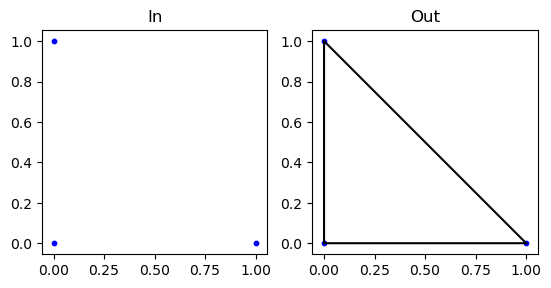

Constructing Delaunay triangulation by divide-and-conquer method.

Writing vertices.
Writing triangles.

Statistics:

  Input vertices: 3

  Mesh vertices: 3
  Mesh triangles: 1
  Mesh edges: 3
  Mesh exterior boundary edges: 3



In [16]:
triin=Triangulate.TriangulateIO()
triin.pointlist=[ 0.0 0; 1 0; 0 1]'
(triout, vorout)=triangulate("", triin)
plotpair(PyPlot,triin,triout)


### Additional creation of the convex hull
- The switch '-c'  leads to the additional creation of  the information
  about the edges at the convex hull

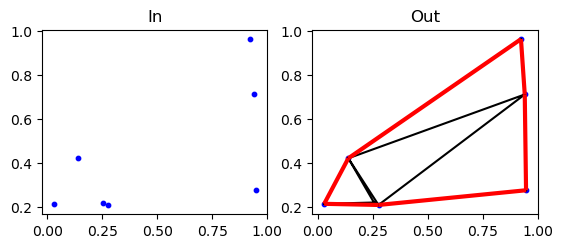

In [17]:
triin=Triangulate.TriangulateIO()
triin.pointlist=rand(Cdouble,2,7)
(triout, vorout)=triangulate("Qc", triin)
plotpair(PyPlot,triin,triout)


### Additional creation of the Voronoi diagram
- The switch '-v'  leads to the additional creation of
  the Voronoi diagram

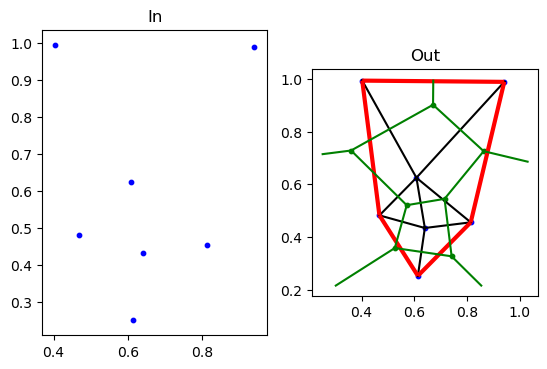

In [5]:
triin=Triangulate.TriangulateIO()
triin.pointlist=rand(Cdouble,2,7)
(triout, vorout)=triangulate("Qcv", triin)
plotpair(PyPlot,triin,triout,voronoi=vorout)


## Conforming Delaunay triangulations

__Definition:__ An admissible triangulation of a polygonal Domain $\Omega\subset \mathbb R^d$
has the boundary conforming Delaunay property if
- All simplices are Delaunay
- All  boundary simplices (edges in 2D, facets in 3d) have the Gabriel property,
  i.e. their minimal circumdisks are empty

Equivalent definition in 2D:
-  Sum of angles opposite to interior edges $\leq$ $\pi$,
-  angle opposite to boundary edge $\leq \frac\pi2$

Corollary:
- All triangle circumcenters are in the interior of the domain
- Weakly acute triangulations are boundary conforming Delaunay, but not vice versa!

Remarks:
- Working with weakly acute triangulations  for general polygonal domains is unrealistic, especially in 3D
- For boundary conforming Delaunay triangulations of polygonal domains
  there are  algoritms with mathematical termination proofs valid in many relevant cases (J. Shewchuk, H. Si)

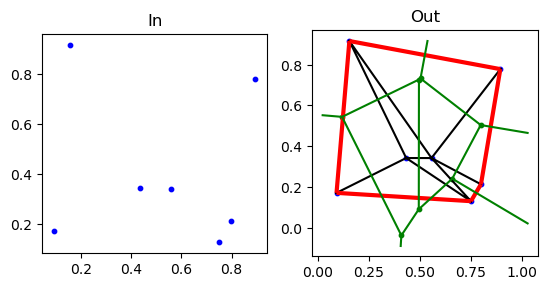

Constructing Delaunay triangulation by divide-and-conquer method.

Writing vertices.
Writing triangles.
Writing segments.
Writing Voronoi vertices.
Writing Voronoi edges.

Statistics:

  Input vertices: 7

  Mesh vertices: 7
  Mesh triangles: 7
  Mesh edges: 13
  Mesh exterior boundary edges: 5



In [6]:
triin=Triangulate.TriangulateIO()
triin.pointlist=rand(Cdouble,2,7)
(triout, vorout)=triangulate("cv", triin)
plotpair(PyPlot,triin,triout,voronoi=vorout)


### Boundary conforming Delaunay triangulation of convex hull
- The switch '-D'  leads to the creation of a boundary conforming
  Delaunay triangulation.
- In this case, "Steiner points" need to be added to the initial point set

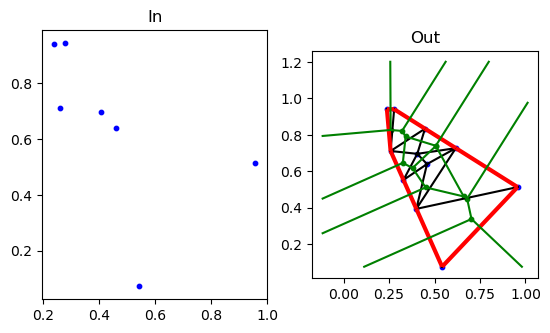

Constructing Delaunay triangulation by divide-and-conquer method.
Adding Steiner points to enforce quality.

Writing vertices.
Writing triangles.
Writing segments.
Writing Voronoi vertices.
Writing Voronoi edges.

Statistics:

  Input vertices: 7

  Mesh vertices: 11
  Mesh triangles: 11
  Mesh edges: 21
  Mesh exterior boundary edges: 9



In [7]:
triin=Triangulate.TriangulateIO()
triin.pointlist=rand(Cdouble,2,7)
(triout, vorout)=triangulate("Dcv", triin)
plotpair(PyPlot,triin,triout,voronoi=vorout)


## Triangulations of finite polygonal domains

- So far, we discussed triangulations of point sets which at best can describe
  convex domains
- Create Delaunay triangulation of point set, "add" segments of a Piecewise Linear Straight Line Graph (PLSG)
  describing the boudary of the domain. This results in a "constrained Delaunay triangulation" which may not
  have the Delaunay property with respect to the bundary vertices.
- Domain is specfied as a piecewise linear straight line graph
- In addition to the point list, we give a list of segments, and use "-p" instead of "-c"
- An additional segement marker list can be specified

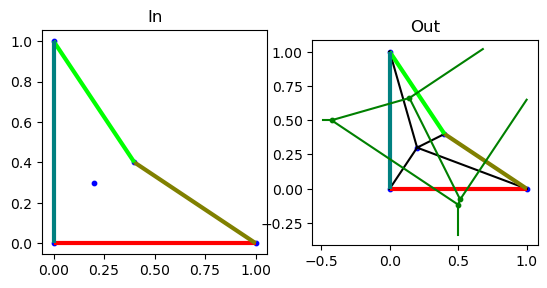

Constructing Delaunay triangulation by divide-and-conquer method.
Recovering segments in Delaunay triangulation.
Removing unwanted triangles.

Writing vertices.
Writing triangles.
Writing segments.
Writing Voronoi vertices.
Writing Voronoi edges.

Statistics:

  Input vertices: 5
  Input segments: 4
  Input holes: 0

  Mesh vertices: 5
  Mesh triangles: 4
  Mesh edges: 8
  Mesh exterior boundary edges: 4
  Mesh interior boundary edges: 0
  Mesh subsegments (constrained edges): 4



In [8]:
triin=Triangulate.TriangulateIO()
triin.pointlist=Matrix{Cdouble}([0.0 0.0 ; 1.0 0.0 ; 0.4  0.4 ; 0.0 1.0; 0.2 0.3]')
triin.segmentlist=Matrix{Cint}([1 2 ; 2 3 ; 3 4 ; 4 1 ]')
triin.segmentmarkerlist=Vector{Int32}([1, 2, 3, 4])
(triout, vorout)=triangulate("pv", triin)
plotpair(PyPlot,triin,triout,voronoi=vorout)


### Boundary conforming Delaunay triangulation
- Once again, '-D' adds the boundary conforming Delaunay property

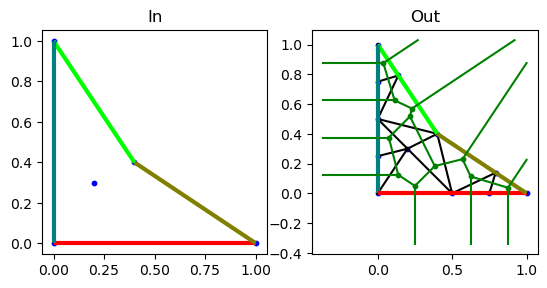

Constructing Delaunay triangulation by divide-and-conquer method.
Recovering segments in Delaunay triangulation.
Removing unwanted triangles.
Adding Steiner points to enforce quality.

Writing vertices.
Writing triangles.
Writing segments.
Writing Voronoi vertices.
Writing Voronoi edges.

Statistics:

  Input vertices: 5
  Input segments: 4
  Input holes: 0

  Mesh vertices: 12
  Mesh triangles: 11
  Mesh edges: 22
  Mesh exterior boundary edges: 11
  Mesh interior boundary edges: 0
  Mesh subsegments (constrained edges): 11



In [9]:
triin=Triangulate.TriangulateIO()
triin.pointlist=Matrix{Cdouble}([0.0 0.0 ; 1.0 0.0 ; 0.4  0.4 ; 0.0 1.0; 0.2 0.3]')
triin.segmentlist=Matrix{Cint}([1 2 ; 2 3 ; 3 4 ; 4 1 ]')
triin.segmentmarkerlist=Vector{Int32}([1, 2, 3, 4])
(triout, vorout)=triangulate("pvD", triin)
plotpair(PyPlot,triin,triout,voronoi=vorout)


### Domain triangulation with area constraint
- '-a' allows to specify a maximum  area constraint.
- '-q' allows to specify minumum angle

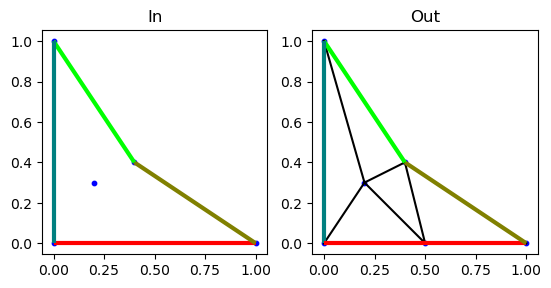

Constructing Delaunay triangulation by divide-and-conquer method.
Recovering segments in Delaunay triangulation.
Removing unwanted triangles.
Adding Steiner points to enforce quality.

Writing vertices.
Writing triangles.
Writing segments.

Statistics:

  Input vertices: 5
  Input segments: 4
  Input holes: 0

  Mesh vertices: 6
  Mesh triangles: 5
  Mesh edges: 10
  Mesh exterior boundary edges: 5
  Mesh interior boundary edges: 0
  Mesh subsegments (constrained edges): 5



In [10]:
triin=Triangulate.TriangulateIO()
triin.pointlist=Matrix{Cdouble}([0.0 0.0 ; 1.0 0.0 ; 0.4  0.4 ; 0.0 1.0; 0.2 0.3]')
triin.segmentlist=Matrix{Cint}([1 2 ; 2 3 ; 3 4 ; 4 1 ]')
triin.segmentmarkerlist=Vector{Int32}([1, 2, 3, 4])
(triout, vorout)=triangulate("pa0.1", triin)
plotpair(PyPlot,triin,triout,voronoi=vorout)


### Domain triangulation with area constraint from user function
- '-u' allows to specify a user defined refinement criterion
- Julia constructs a c-callable function which is called by Triangle

In [11]:
function unsuitable(x1,y1,x2,y2,x3,y3,area)
    bary_x=(x1+x2+x3)/3.0
    bary_y=(y1+y2+y3)/3.0
    dx=bary_x-0.1
    dy=bary_y-0.1
    area>0.001*exp(50.0*(dx^2+dy^2))
end

unsuitable (generic function with 1 method)

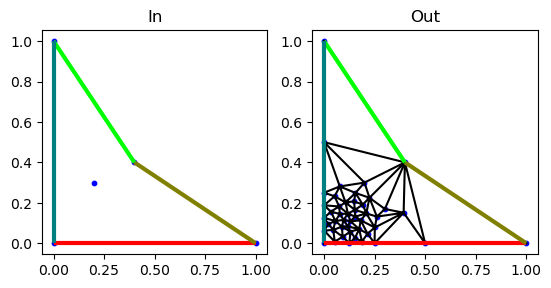

Constructing Delaunay triangulation by divide-and-conquer method.
Recovering segments in Delaunay triangulation.
Removing unwanted triangles.
Adding Steiner points to enforce quality.

Writing vertices.
Writing triangles.
Writing segments.

Statistics:

  Input vertices: 5
  Input segments: 4
  Input holes: 0

  Mesh vertices: 46
  Mesh triangles: 78
  Mesh edges: 123
  Mesh exterior boundary edges: 12
  Mesh interior boundary edges: 0
  Mesh subsegments (constrained edges): 12



In [12]:
triin=Triangulate.TriangulateIO()
triin.pointlist=Matrix{Cdouble}([0.0 0.0 ; 1.0 0.0 ; 0.4  0.4 ; 0.0 1.0; 0.2 0.3]')
triin.segmentlist=Matrix{Cint}([1 2 ; 2 3 ; 3 4 ; 4 1 ]')
triin.segmentmarkerlist=Vector{Int32}([1, 2, 3, 4])
triunsuitable(unsuitable)
(triout, vorout)=triangulate("pa0.1u", triin)
plotpair(PyPlot,triin,triout,voronoi=vorout)


## Relevant output for numerical simulation (depends on method, implementation $\dots$):
- List of points
- List of triangles which for each triangle describes indices of points belonging to triangle
- List of (boundary) segments which for each segment describes indices of points belonging to segment
- Possibly: list of segment markers (which can be used to distiguish boundary conditions)
- Possibly: list of triangle attributes (which describe subdomain information)

triout.pointlist = [0.0 1.0 0.4 0.0 0.2 0.5; 0.0 0.0 0.4 1.0 0.3 0.0]
triout.trianglelist = 

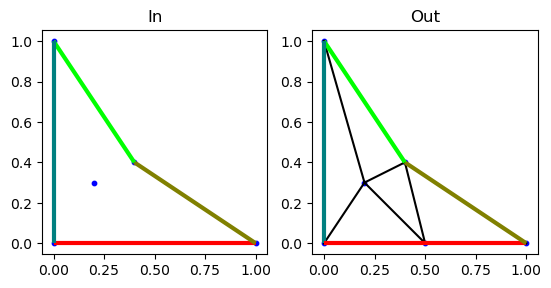

Int32[4 6 3 5 5; 1 3 6 1 3; 5 5 2 6 4]
triout.segmentlist = Int32[2 2 4 1 6; 6 3 3 4 1]
triout.segmentmarkerlist = Int32[1, 2, 3, 4, 1]
triout.triangleattributelist = Array{Float64}(undef,0,0)


0×0 Array{Float64,2}

In [13]:
triin=Triangulate.TriangulateIO()
triin.pointlist=Matrix{Cdouble}([0.0 0.0 ; 1.0 0.0 ; 0.4  0.4 ; 0.0 1.0; 0.2 0.3]')
triin.segmentlist=Matrix{Cint}([1 2 ; 2 3 ; 3 4 ; 4 1 ]')
triin.segmentmarkerlist=Vector{Int32}([1, 2, 3, 4])
(triout, vorout)=triangulate("pa0.1Q", triin)
plotpair(PyPlot,triin,triout,voronoi=vorout)

@show triout.pointlist
@show triout.trianglelist
@show triout.segmentlist
@show triout.segmentmarkerlist
@show triout.triangleattributelist

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*